# load and import

In [1]:
R.version.string
library('dplyr')

library('stringr')
library('tidyr')
library('ggplot2')

library(ggh4x)
# library(tidyverse)
# Load necessary libraries
# library(magick)
library(cowplot)
library(patchwork)
library(gridExtra)
library(png)
library(grid)

[1] "R version 4.3.1 (2023-06-16)"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
map_id_name <- read.csv('../gene_table_and_other_scripts/bioMartR_Ath_all_genes_info_googled.csv')
map_id_name <- map_id_name %>% dplyr::rename('gene_name' = 'external_gene_name', 'gene_id' = 'ensembl_gene_id')
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT4G20200,AT4G20200
AT3G45040,DOK1


In [3]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

# GO terms

In [4]:
GO_ID_terms <-  readRDS('../Pathway_plot//Rdata/GO_ID_terms.rds')

In [5]:
JA <- GO_ID_terms %>% filter(GO_ID == 'GO:0009753', code != 'IEA') %>% select(AGI)

In [6]:
PCD <- GO_ID_terms %>% filter(GO_ID == 'GO:0012501', code != 'IEA') %>% select(AGI)

**<span style="color:red">### remove TIR  and P-loop, only have 2 AGI</span>**


# Pathways

In [7]:
updated_NLRs_table <- read.csv("../gene_table_and_other_scripts/Col-0_NLRs_167_Ya-Long_Donghui_20240321.csv") %>% 
    select(AGI, Primary.Gene.Symbol)

In [8]:
NLRs_and_TIRs <- read.csv(file = "../gene_table_and_other_scripts/NLRs_and_TIR_only.csv") 

In [9]:
Pathways_Ngou_2021 <- readxl::read_excel("../gene_table_and_other_scripts/Ngou_2021_Nature_figure2E_pathways_mod.xlsx")

In [10]:
Pathways <- Pathways_Ngou_2021 %>% dplyr::select(Target, GeneFamily)
Pathways <- Pathways %>%as.data.frame  %>% dplyr::rename('AGI' = 'Target')
LRRs <- Pathways %>% filter(GeneFamily %>% str_detect('LRR'))

In [11]:
LRRs

AGI,GeneFamily
<chr>,<chr>
AT1G51820,LRR-RLKs
AT2G19190,LRR-RLKs
AT1G17750,LRR-RLKs
AT1G55610,LRR-RLKs
AT1G51890,LRR-RLKs
AT1G74360,LRR-RLKs
AT1G73080,LRR-RLKs
AT3G13380,LRR-RLKs
AT1G56140,LRR-RLKs


## add GO terms

# Res

In [12]:
Res_adr1s <-  readRDS('../JC14_and_DMs/Rdata/Res_adr1.rds')
Res_3DM <-  readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds')
Res_3DM_and_adr1s <- Res_3DM  %>% rbind(Res_adr1s)

In [13]:
Res_2DM <- Res_3DM %>% filter(contrast %>% str_detect('DM1/DM2d|DM6/DM7'))

In [14]:
Res_Pathogen <- readRDS('../RNA_seq_Pathogen/Rds_Rdata_hisat2//Res2023-04-21 15:54:40.rdata') %>% filter(Contrast %>% str_detect('Mock') ) %>%filter(Contrast %>% str_detect('Avr'))
Res_Pathogen <- Res_Pathogen %>% select(Gene, log2FoldChange, Contrast)  %>% dplyr::rename('source' = 'Contrast', 'AGI' = 'Gene')

In [15]:
Res_Pathogen %>% distinct()

AGI,log2FoldChange,source
<chr>,<dbl>,<chr>
AT1G30814,-0.829686864,AvrRpt2-6h_vs_Mock-6h
AT1G78930,-0.011894928,AvrRpt2-6h_vs_Mock-6h
AT1G71695,-0.098855557,AvrRpt2-6h_vs_Mock-6h
AT1G58983,0.083782797,AvrRpt2-6h_vs_Mock-6h
AT1G12980,-2.460711255,AvrRpt2-6h_vs_Mock-6h
AT1G56250,0.254901801,AvrRpt2-6h_vs_Mock-6h
AT1G69810,0.661998002,AvrRpt2-6h_vs_Mock-6h
AT1G72450,1.784604326,AvrRpt2-6h_vs_Mock-6h
AT1G76280,-0.340306572,AvrRpt2-6h_vs_Mock-6h


In [16]:
Res_adr1s <-  readRDS('../JC14_and_DMs/Rdata/Res_adr1.rds')
Res_adr1s <-  Res_adr1s %>% select(AGI, log2FoldChange, line) %>% dplyr::rename('source' = 'line')

Res_3DM <-  readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds')
Res_3DM <- Res_3DM %>% select(AGI, log2FoldChange, line)%>% dplyr::rename('source' = 'line')

# Res_Pathogen <- readRDS('../RNA_seq_Pathogen/Rds_Rdata_hisat2//Res2023-04-21 15:54:40.rdata')
# Res_Pathogen <- Res_Pathogen %>% select(Gene, log2FoldChange, Contrast)  %>% dplyr::rename('source' = 'Contrast', 'AGI' = 'Gene')
# Res_Pathogen <- Res_Pathogen %>% filter( source %>% str_detect('control', negate = T) )# %>% pull(source) %>% unique

Res_combined <- Res_3DM %>% rbind(Res_Pathogen)  %>% rbind(Res_adr1s)
Res_combined <- Res_combined %>% dplyr::rename('log2FC' = 'log2FoldChange')
Res_combined <- Res_combined %>% mutate(source = source %>% str_remove('_vs_Mock-\\d{1,2}h$'))

In [17]:
Res_combined %>% pull(source) %>% unique

[1] "DM6/DM7"        "DM1/DM2d"       "DM10/DM11"      "AvrRpt2-6h"    
 [5] "AvrRpt2-12h"    "AvrRpt2-20h"    "AvrRps4-6h"     "AvrRps4-12h"   
 [9] "AvrRps4-20h"    "DM1/DM2d_adr1s" "DM6/DM7_adr1s"  "Col-0_adr1s"

In [18]:
Res_combined <- Res_combined %>% mutate(source = factor(source, levels = c('DM10/DM11','DM1/DM2d','DM1/DM2d_adr1s','DM6/DM7','DM6/DM7_adr1s','Col-0_adr1s','AvrRpt2-6h','AvrRpt2-12h','AvrRpt2-20h','AvrRps4-6h','AvrRps4-12h','AvrRps4-20h')) )
Res_combined$source %>% unique

[1] DM6/DM7        DM1/DM2d       DM10/DM11      AvrRpt2-6h     AvrRpt2-12h   
 [6] AvrRpt2-20h    AvrRps4-6h     AvrRps4-12h    AvrRps4-20h    DM1/DM2d_adr1s
[11] DM6/DM7_adr1s  Col-0_adr1s   
12 Levels: DM10/DM11 DM1/DM2d DM1/DM2d_adr1s DM6/DM7 ... AvrRps4-20h

In [19]:
Res_combined %>% filter(AGI == 'AT4G31800')

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT4G31800,2.9995971,DM6/DM7
AT4G31800,3.8162690,DM1/DM2d
AT4G31800,6.7578698,DM10/DM11
AT4G31800,0.5854599,AvrRpt2-6h
AT4G31800,1.3702201,AvrRpt2-12h
AT4G31800,1.9461826,AvrRpt2-20h
AT4G31800,0.5789410,AvrRps4-6h
AT4G31800,1.5801906,AvrRps4-12h
AT4G31800,1.8052653,AvrRps4-20h


In [20]:
Res_combined %>% filter(AGI == 'AT1G18330')

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT1G18330,-0.1900631,DM6/DM7
AT1G18330,-2.9147356,DM1/DM2d
AT1G18330,-2.6333851,DM10/DM11
AT1G18330,-0.4016819,AvrRpt2-6h
AT1G18330,-0.9161276,AvrRpt2-12h
AT1G18330,-1.3443016,AvrRpt2-20h
AT1G18330,-0.8446993,AvrRps4-6h
AT1G18330,-0.9143487,AvrRps4-12h
AT1G18330,-1.1172526,AvrRps4-20h


In [21]:
Res_combined %>% filter(AGI == 'AT2G20020') #CAF1

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT2G20020,-0.8293918,DM6/DM7
AT2G20020,-1.4319626,DM1/DM2d
AT2G20020,-0.5591756,DM10/DM11
AT2G20020,-0.1990223,AvrRpt2-6h
AT2G20020,-0.4911364,AvrRpt2-12h
AT2G20020,-1.3881606,AvrRpt2-20h
AT2G20020,-0.2037179,AvrRps4-6h
AT2G20020,-0.3942780,AvrRps4-12h
AT2G20020,-1.1415800,AvrRps4-20h


In [22]:
Res_combined %>% filter(AGI == 'AT4G02020') #SWINGER

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT4G02020,0.60496167,DM6/DM7
AT4G02020,-0.02610947,DM1/DM2d
AT4G02020,0.14185040,DM10/DM11
AT4G02020,-0.25327111,AvrRpt2-6h
AT4G02020,-0.49287512,AvrRpt2-12h
AT4G02020,-0.57906805,AvrRpt2-20h
AT4G02020,-0.07797130,AvrRps4-6h
AT4G02020,-0.58610817,AvrRps4-12h
AT4G02020,-0.62922603,AvrRps4-20h


In [23]:
Res_combined %>% filter(AGI == 'AT2G23380') #CURLY LEAF (CLF

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT2G23380,-0.08124671,DM6/DM7
AT2G23380,0.29341566,DM1/DM2d
AT2G23380,-1.20421947,DM10/DM11
AT2G23380,0.22221148,AvrRpt2-6h
AT2G23380,0.02538577,AvrRpt2-12h
AT2G23380,0.09071269,AvrRpt2-20h
AT2G23380,0.24448754,AvrRps4-6h
AT2G23380,-0.12234628,AvrRps4-12h
AT2G23380,-0.05892241,AvrRps4-20h


In [26]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
    "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

bar_colors <-  c("DM6/DM7 vs Col-0" = "#EDC5BF", 'DM1/DM2d vs Col-0' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s vs Col-0' = '#008DFA' , 'DM1/DM2d_adr1s vs Col-0' = '#008DFA', 
                 'Col-0_adr1s vs Col-0' = '#008DFA',
                  "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67")

In [27]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
    "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

bar_colors <-  c("DM6/DM7 vs Col-0" = "#EDC5BF", 'DM1/DM2d vs Col-0' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s vs Col-0' = '#008DFA' , 'DM1/DM2d_adr1s vs Col-0' = '#008DFA', 
                 'Col-0_adr1s vs Col-0' = '#008DFA',
                 "DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s' = '#008DFA' , 'DM1/DM2d_adr1s' = '#008DFA', 
                 'Col-0_adr1s' = '#008DFA',
                  "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#cfa3e6", "AvrRps4-20h" = "#a884ba", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#cf8655")

# Venn

In [28]:
NLRs_Res_3DM_and_adr1s <- Res_3DM_and_adr1s %>% right_join(NLRs_and_TIRs, by = 'AGI')

In [29]:
up_NLRs <- list(
  'DM6/DM7' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, log2FoldChange > 2, line == 'DM6/DM7', padj < 0.05) %>%
    arrange(desc(log2FoldChange)) %>% ##by default arrange is ascending
    pull(AGI),
  'DM1/DM2d' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, log2FoldChange > 2, line == 'DM1/DM2d', padj < 0.05) %>%
    arrange(desc(log2FoldChange)) %>% ##by default arrange is ascending
    pull(AGI),
  'DM10/DM11' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, log2FoldChange > 2, line == 'DM10/DM11', padj < 0.05) %>%
    arrange(desc(log2FoldChange)) %>% ##by default arrange is ascending
    pull(AGI),
  'DM1/DM2d_adr1s' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, line == 'DM1/DM2d_adr1s', padj < 0.05, log2FoldChange > 2) %>%
    arrange(desc(log2FoldChange)) %>%
    pull(AGI),
  'DM6/DM7_adr1s' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, line == 'DM6/DM7_adr1s', padj < 0.05, log2FoldChange > 2) %>%
    arrange(desc(log2FoldChange)) %>%
    pull(AGI),
  'Col-0_adr1s' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, line == 'Col-0_adr1s', padj < 0.05, log2FoldChange > 2) %>%
    arrange(desc(log2FoldChange)) %>%
    pull(AGI)
    
)
up_NLRs

$`DM6/DM7`
 [1] "AT4G23515" "AT5G44900" "AT5G38344" "AT4G11170" "AT4G27220" "AT5G44920"
 [7] "AT3G04220" "AT5G45000" "AT5G38350" "AT5G45090" "AT1G72860" "AT2G17050"
[13] "AT1G17615" "AT2G20142" "AT3G25510" "AT1G58390" "AT5G18350" "AT5G44910"
[19] "AT5G41750" "AT1G59780" "AT3G44400" "AT4G23510" "AT2G17060" "AT5G38340"
[25] "AT5G45070" "AT1G65850" "AT2G16870" "AT4G14370" "AT2G32140" "AT5G41550"
[31] "AT5G46260" "AT4G33300" "AT5G18360" "AT1G57650" "AT1G72950" "AT1G72900"
[37] "AT1G12290" "AT5G05400" "AT1G15890" "AT1G33560"

$`DM1/DM2d`
 [1] "AT4G19925" "AT1G17615" "AT5G38350" "AT5G38344" "AT1G57650" "AT5G18350"
 [7] "AT4G11340" "AT4G16920" "AT5G45090" "AT4G11170" "AT5G45000" "AT5G45070"
[13] "AT3G14470" "AT2G32140" "AT2G20142" "AT5G41750" "AT4G27220" "AT1G72890"
[19] "AT5G41550" "AT3G04220" "AT5G45080" "AT1G66090" "AT3G14460" "AT4G14370"
[25] "AT4G08450" "AT5G38340" "AT1G52900" "AT5G58120" "AT3G44400" "AT5G46520"
[31] "AT2G16870" "AT1G72950" "AT5G41740" "AT1G17600" "AT1G58390" "AT1G31540"
[37] "AT1G33560" "AT5G66910" "AT5G44510" "AT1G12290" "AT1G17610" "AT3G25510"
[43] "AT4G33300" "AT5G46490" "AT1G72900" "AT1G65850" "AT5G45440" "AT1G72870"
[49] "AT5G04720" "AT5G18370"

$`DM10/DM11`
 [1] "AT4G19925" "AT4G11340" "AT1G17615" "AT1G57650" "AT1G66090" "AT3G25510"
 [7] "AT5G38350" "AT4G11170" "AT5G18350" "AT1G52900" "AT5G45000" "AT2G20142"
[13] "AT2G32140" "AT4G14370" "AT5G38344" "AT1G64070" "AT4G27220" "AT5G41750"
[19] "AT1G17610" "AT5G41740" "AT1G72900" "AT1G72890" "AT4G19520" "AT3G04220"
[25] "AT5G38340" "AT4G23510" "AT1G72930" "AT4G33300" "AT4G08450" "AT1G51270"
[31] "AT5G51630" "AT1G65850" "AT1G33560" "AT1G72920" "AT1G31540" "AT1G12290"
[37] "AT1G72910" "AT4G23515" "AT1G17600" "AT3G44400" "AT3G14470" "AT5G04720"
[43] "AT3G44630" "AT5G41550" "AT3G14460" "AT1G58390" "AT1G72940" "AT5G46520"
[49] "AT3G51560" "AT5G66910" "AT1G47370" "AT1G63750" "AT1G56520" "AT3G44480"
[55] "AT5G44920" "AT4G36150" "AT1G63870" "AT5G45440" "AT5G18370" "AT5G18360"
[61] "AT1G72950" "AT5G48780" "AT5G58120" "AT1G59620" "AT4G16960" "AT3G44670"
[67] "AT1G56510" "AT3G50950" "AT3G04210" "AT4G16890" "AT5G46510" "AT5G46490"
[73] "AT2G16870" "AT2G17050" "AT2G14080"

$`DM1/DM2d_adr1s`
 [1] "AT1G17615" "AT5G38350" "AT1G57630" "AT1G57650" "AT5G45090" "AT4G19925"
 [7] "AT1G17610" "AT4G11170" "AT5G41750" "AT2G32140" "AT4G11340" "AT5G38344"
[13] "AT2G20142" "AT5G45000" "AT3G04220" "AT4G14370" "AT5G41550" "AT3G25510"
[19] "AT1G66090" "AT1G33560" "AT1G58390" "AT2G16870" "AT1G72900"

$`DM6/DM7_adr1s`
 [1] "AT4G27220" "AT1G58390" "AT5G45090" "AT4G11170" "AT5G45000" "AT1G57650"
 [7] "AT5G44920" "AT5G41750" "AT4G14370" "AT5G38340" "AT3G25510"

$`Col-0_adr1s`
[1] "AT5G58120" "AT1G50180" "AT5G44510"

In [30]:
library(VennDiagram)
futile.logger::flog.threshold(futile.logger::ERROR, name = "VennDiagramLogger") ##suppress the log file 

Loading required package: futile.logger



NULL

In [31]:
Res_3DM_and_adr1s

AGI,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tissue,line,contrast,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
AT1G30814,30.3735985,5.18459620,1.1880403,4.36399006,1.277114e-05,5.457536e-05,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,AT1G30814
AT1G78930,229.5290030,0.01991274,0.2313721,0.08606374,9.314157e-01,9.797915e-01,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,AT1G78930
AT1G71695,4279.2158462,-2.30890364,0.3467650,-6.65841044,2.768049e-11,3.119551e-10,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,AT1G71695
AT1G58983,160.5416134,-0.17951020,0.9294748,-0.19313078,8.468565e-01,9.160421e-01,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,AT1G58983
AT1G12980,5.5871965,2.27948272,1.4560934,1.56547838,1.174708e-01,1.894272e-01,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,ESR1
AT1G56250,66.5033746,0.77412597,0.7988443,0.96905738,3.325166e-01,4.458052e-01,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,PP2-B14
AT1G66852,0.2392222,0.00000000,6.5584380,0.00000000,1.000000e+00,NA,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,AT1G66852
AT1G69810,174.6157257,2.76176191,0.6470886,4.26798103,1.972501e-05,8.109245e-05,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,WRKY36
AT1G72450,2731.0180974,-0.41945456,0.3845236,-1.09084205,2.753424e-01,3.826846e-01,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,JAZ6


# Bar plot of NLRs

In [32]:
Res_combined %>% filter(AGI  == 'AT4G14390')

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT4G14390,6.35565974,DM6/DM7
AT4G14390,8.05872953,DM1/DM2d
AT4G14390,8.98735730,DM10/DM11
AT4G14390,0.04927757,AvrRpt2-6h
AT4G14390,0.00000000,AvrRpt2-12h
AT4G14390,0.17014255,AvrRpt2-20h
AT4G14390,0.06511173,AvrRps4-6h
AT4G14390,3.58068134,AvrRps4-12h
AT4G14390,1.63150265,AvrRps4-20h


In [33]:
library(glue)
library(ggtext)

In [34]:
options(repr.plot.width=8, repr.plot.height=4)
cols_text <- c( 'TIR-NBS-LRR' =  "#386cb0",
          'TIR'= "#a6cee3", "TIR-NBS" = "#2581ba",
          
          "CC-NBS-LRR" = "#fdb462",'CC-NBS' =  "#fb9a99", 'RPW8-NBS-LRR' = "#984ea3",
          
          'NBS-LRR' = "#b3b330", 
          'P-loop' = "#7fc97f"
         )

# show_col(cols_text, ncol = 6)
# cols_text
cols_text_2 <- cols_text %>% as.data.frame() %>%  tibble::rownames_to_column("Class") %>% rename(label_color = 2)

In [35]:
Res_NLRs <- Res_combined %>% right_join(NLRs_and_TIRs, by = 'AGI')

In [36]:
Res_NLRs <- Res_NLRs %>% 
    mutate(plot_label = paste0(Symbol, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) %>% 
    left_join(cols_text_2, by = 'Class')  

In [37]:
# Extract plot_label and label_color from Res_NLRs_up
plot_label_color <- Res_NLRs %>% select(plot_label, label_color)

# Create a named list with label_color as content and plot_label as names
color_list <- setNames(as.list(plot_label_color$label_color), plot_label_color$plot_label)


In [38]:
Res_NLRs_color <- Res_NLRs %>% mutate(label_color_markdown =
        glue("<i style='color: {color_list[plot_label]}'>{plot_label}</i>")) 


In [39]:
Res_NLRs_color

AGI,log2FC,source,Class,Symbol,Organization,plot_label,label_color,label_color_markdown
<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>
AT1G56540,0.73768310,DM6/DM7,TIR-NBS-LRR,AT1G56540,clustered,AT1G56540,#386cb0,<i style='color: #386cb0'>AT1G56540</i>
AT1G63360,0.09548923,DM6/DM7,CC-NBS-LRR,AT1G63360,clustered,AT1G63360,#fdb462,<i style='color: #fdb462'>AT1G63360</i>
AT1G53350,0.74051156,DM6/DM7,CC-NBS-LRR,AT1G53350,NA,AT1G53350,#fdb462,<i style='color: #fdb462'>AT1G53350</i>
AT1G58848,1.66607221,DM6/DM7,CC-NBS-LRR,AT1G58848,NA,AT1G58848,#fdb462,<i style='color: #fdb462'>AT1G58848</i>
AT1G63880,0.90581650,DM6/DM7,TIR-NBS-LRR,AT1G63880,clustered,AT1G63880,#386cb0,<i style='color: #386cb0'>AT1G63880</i>
AT1G61300,-1.09160953,DM6/DM7,NBS-LRR,AT1G61300,clustered,AT1G61300,#b3b330,<i style='color: #b3b330'>AT1G61300</i>
AT1G63740,0.81169961,DM6/DM7,TIR-NBS-LRR,AT1G63740,clustered,AT1G63740,#386cb0,<i style='color: #386cb0'>AT1G63740</i>
AT1G27170,0.35303205,DM6/DM7,TIR-NBS-LRR,AT1G27170,clustered,AT1G27170,#386cb0,<i style='color: #386cb0'>AT1G27170</i>
AT1G31540,1.20302747,DM6/DM7,TIR-NBS-LRR,AT1G31540,singleton,AT1G31540,#386cb0,<i style='color: #386cb0'>AT1G31540</i>


<i style='color: #386cb0'>AT1G65850</i>

<i style='color: green'>the idea here is that pre set order x = reorder(label_color_markdown, log2FoldChange) is not preserved, I have to plot 3 geom_bar first, then put the hundreds layers of each NLRs geom_bar over it. </i>

In [40]:
keep_NLRs <-  c (Res_NLRs_color %>% filter(abs(log2FC) > 2.4) %>% pull(AGI) %>% unique(),
                 'AT5G66900') #add nrg1.1

In [41]:
Res_NLRs_color <- Res_NLRs_color %>% dplyr::filter(AGI %in% keep_NLRs )
Res_NLRs_color <- Res_NLRs_color %>% arrange(desc(log2FC))

In [42]:
Res_NLRs_color <- Res_NLRs_color %>% mutate(category = source %>% str_remove('_adr1s') %>% str_remove('-\\d{1,2}h$'))

In [43]:
each_NLR_max_log2FC <- Res_NLRs_color %>% group_by(AGI) %>% slice_head(n=1) %>% ungroup %>% arrange(desc(log2FC))

In [44]:
each_NLR_Col_log2FC <- Res_NLRs_color %>% filter(source == 'Col-0_adr1s' ) %>%
     arrange(desc(log2FC))

In [45]:
Res_NLRs_color <- Res_NLRs_color %>% mutate(source = source %>% str_replace('DM6/DM7$', 'DM6/DM7 vs Col-0') %>%
        str_replace('DM6/DM7_adr1s', 'DM6/DM7_adr1s vs Col-0') %>%
        str_replace('DM1/DM2d$', 'DM1/DM2d vs Col-0') %>% str_replace('DM1/DM2d_adr1s', 'DM1/DM2d_adr1s vs Col-0') %>%
        str_replace('Col-0_adr1s', 'Col-0_adr1s vs Col-0')
                         )

In [46]:
options(repr.plot.width=8.4, repr.plot.height=6, repr.plot.res = 50)


plot_NLRs_overlay_bar <- function(Res = Res_NLRs_color, Res_base = each_NLR_Col_log2FC,  alpha = 0.6, facet_row = "Class", facet_col = "category") {
  library(purrr)
  library(rlang) # for sym()

  # Convert facet strings to symbols
  facet_row <- sym(facet_row)
  facet_col <- sym(facet_col)
  
  # Step 1: Split the dataframe based on log2FoldChange
  over0 <- Res %>% filter(log2FC > 0) 
  below0 <- Res %>% filter(log2FC <= 0)

  # Step 2: Create a list to store the dataframes for each layer
  layers <- list()

  # Step 3: Iterate until there are no rows left in over0 and below0
  layer_num <- 1
  while (nrow(over0) > 0 || nrow(below0) > 0) {
    max_over0 <- over0 %>% group_by( AGI) %>% slice_max(log2FC)
    min_below0 <- below0 %>% group_by( AGI) %>% slice_min(log2FC)

    over0 <- suppressMessages(anti_join(over0, max_over0))
    below0 <- suppressMessages(anti_join(below0, min_below0))

    layer <- bind_rows(max_over0, min_below0)
    layers[[layer_num]] <- layer

    layer_num <- layer_num + 1
  }

  # Step 4: Use the layers list to add new layers to the ggplot using geom_bar
  bar_NLRs_base <- Res %>%
    ggplot(aes(x = reorder(label_color_markdown, log2FC), y = log2FC, label = label_color_markdown)) +
    labs(y = "Log2 FoldChange") +
    coord_flip() +
    guides(fill = guide_legend(reverse = TRUE, nrow = 2)) +
    scale_y_continuous(breaks = c(-8,-6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16),
                       expand = c(0, 0)) +
    scale_fill_manual(values = bar_colors)+
    theme_Publication() +
    theme(axis.text = element_text(size = 8),
          axis.title = element_text(size = 8),
          axis.title.y = element_blank()) +
    theme(text = element_text(size = 8, family = "Arial"), 
          strip.text = element_text(size = 12)) +
    facet_grid(rows = vars(!!facet_row), cols = vars(!!facet_col), scales = "free", space = "free") + # use !! to evaluate symbols
    theme(axis.text.y = element_markdown())   +
    geom_bar(data = Res_base,
                 position="identity", stat='identity', aes(fill=source), width = .8,  alpha = 0 ) 

  bar_NLRs <- reduce(layers, function(plot, layer) {
    plot +
      geom_bar(data = layer,
               position = "identity",
               stat = 'identity',
               aes(fill = source),
               width = .8,
               alpha = alpha)
  }, .init = bar_NLRs_base)
  bar_NLRs <- bar_NLRs + geom_hline(yintercept=0,  color = "black", size=0.5)
  # Return the final plot
  return(bar_NLRs)
}



In [47]:
NLRs_in_connectivity_table <- read.csv('./WGCNA_output_all/NLRs_and_TIRs_connectivity_table_info.csv') 

In [48]:
Res_NLRs_in_connectivity_table <- NLRs_in_connectivity_table %>% dplyr::rename('AGI' = 'gene') %>% 
    left_join(Res_NLRs_color, by = 'AGI') %>% filter(category != 'DM10/DM11') %>% distinct

In [49]:
Res_NLRs_in_connectivity_table <- Res_NLRs_in_connectivity_table %>% mutate(module = factor(module, levels = c('MEblue','MEpurple','MEdarkturquoise',   'MEcyan','MEdarkred',
            'MEgreenyellow','MEsalmon','MEtan','MEdarkgreen','MEmidnightblue') %>% rev()))

In [50]:
Res_NLRs_in_connectivity_table_Col <- Res_NLRs_in_connectivity_table %>% 
        filter(source == 'Col-0_adr1s vs Col-0' ) %>% arrange(desc(log2FC))

In [51]:
Res_NLRs_in_connectivity_table %>% saveRDS('./Rdata/Res_NLRs_in_connectivity_table.rds')


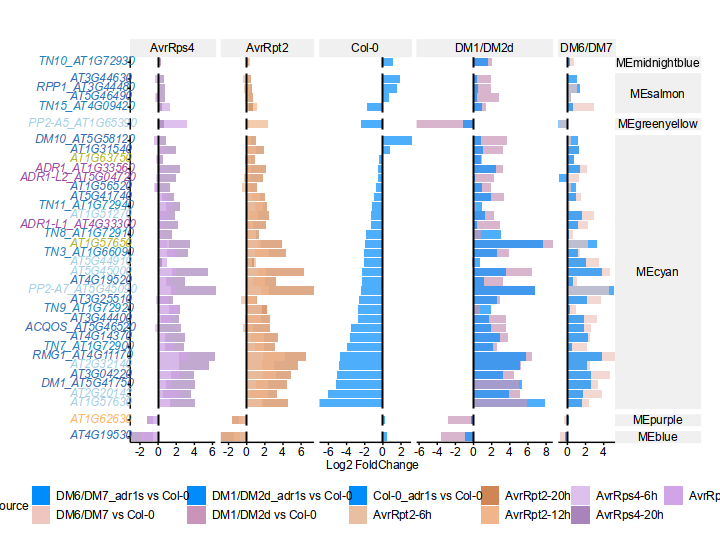

In [156]:


theme_custom <- function() {
  theme(
    text = element_text(family = "Arial", size = 8, face = "plain"),  # Set face = "plain" for all text
    axis.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for axis titles
    axis.text = element_text(family = "Arial", size = 8, face = "plain"),   # Overrides for axis text
    legend.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend titles
    legend.text = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend text
    strip.text.x = element_text(family = "Arial", size = 8, face = "plain"),  # Specific adjustment for x facet label
    strip.text.y = element_text(family = "Arial", size = 8, angle = 0, face = "plain")  # Specific adjustment for y facet label
  )
}



width_ = 7.2
height_ = 5.5
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 100)

bar_NLRs_plot <- plot_NLRs_overlay_bar(Res = Res_NLRs_in_connectivity_table , 
                      Res_base = Res_NLRs_in_connectivity_table_Col, 
                      facet_row = "module", alpha = 0.7) + 
                theme( strip.text.y = element_text(angle = 0)) + theme_custom() # Make facet labels horizontal)
# Save the final plot to a PDF file
bar_NLRs_plot
bar_NLRs_plot %>% ggsave(file = paste0("./plots/overlap_bar_NLRs", Sys.time(), ".pdf"),
                         width = width_ , height = height_)
# bar_NLRs_plot %>% ggsave(file = paste0("./plots/overlap_bar_NLRs", Sys.time(), ".png"), width = 14 , height = 10)

### ADR1s helps to maintain a basal level of NLRs in WT non-challenged state, 

In [53]:
LRRs_connectivity_table_info <- read.csv('./WGCNA_output_all/LRRs_connectivity_table_info.csv') 

In [54]:
Res_LRRs <- Res_combined %>% left_join(map_id_name, by = c('AGI' = 'gene_id')) %>%
    mutate(label_color_markdown = paste0(gene_name, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) %>% 
    right_join(LRRs_connectivity_table_info, by = c('AGI'= 'gene')) %>% mutate(category = source %>% str_remove('_adr1s') %>% str_remove('-\\d{1,2}h$')) %>% filter(category != 'DM10/DM11')

In [55]:
Res_LRRs <- Res_LRRs %>% mutate(module = factor(module, levels = c('MEblue','MEpurple','MEdarkturquoise',   'MEcyan','MEdarkred',
            'MEgreenyellow','MEsalmon','MEtan','MEdarkgreen','MEmidnightblue') %>% rev()))

In [56]:
Res_LRRs_Col <- Res_LRRs %>% filter(source == 'Col-0_adr1s' ) %>%
     arrange(desc(log2FC))

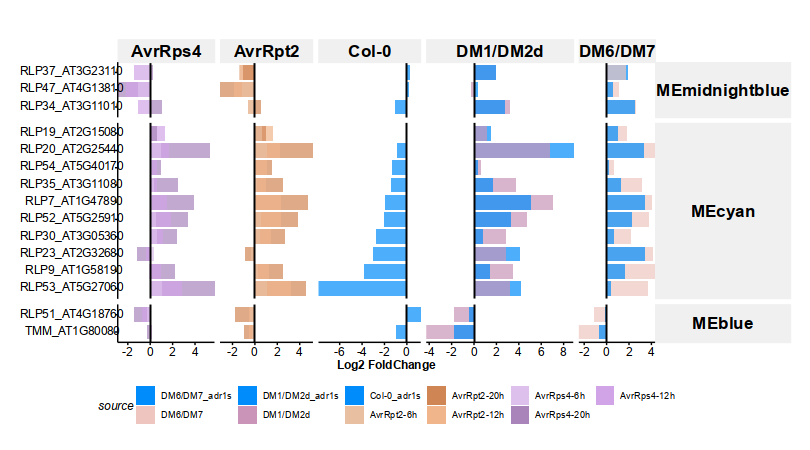

In [57]:
width_ = 8.1
height_ = 4.5
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 100)

bar_LRR <- plot_NLRs_overlay_bar(Res = Res_LRRs %>% filter(GeneFamily %>% str_detect('RLP')) , 
                      Res_base = Res_LRRs_Col  %>% filter(GeneFamily %>% str_detect('RLP')) , 
                      facet_row = "module", alpha = 0.7) + theme( strip.text.y = element_text(angle = 0))  # Make facet labels horizontal)
# Save the final plot to a PDF file
bar_LRR
bar_LRR %>% ggsave(file = paste0("./plots/RLP_overlap_bar_LRRs", Sys.time(), ".pdf"), width = width_ , height = height_)

In [58]:
Res_LRRs %>% filter(GeneFamily %>% str_detect('RLK')) %>% pull(AGI) %>% unique %>% length

[1] 88

In [59]:
filtered_RLKs <- Res_LRRs %>% filter(GeneFamily %>% str_detect('RLK')) %>% filter(abs(log2FC) > 2) %>% pull(AGI) %>% unique 

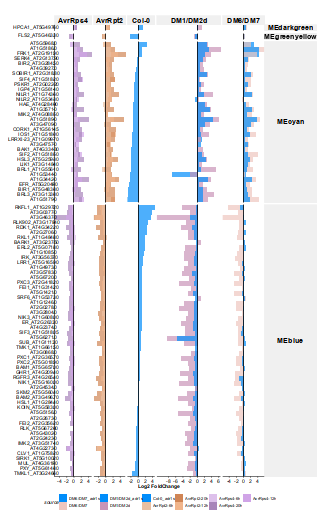

In [60]:
width_ = 8.1
height_ = 13
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 40)

bar_LRR <- plot_NLRs_overlay_bar(Res = Res_LRRs %>% filter(GeneFamily %>% str_detect('RLK')) , 
                      Res_base = Res_LRRs_Col  %>% filter(GeneFamily %>% str_detect('RLK')) , 
                      facet_row = "module", alpha = 0.7) + theme( strip.text.y = element_text(angle = 0))  # Make facet labels horizontal)
# Save the final plot to a PDF file
bar_LRR
bar_LRR %>% ggsave(file = paste0("./plots/all_RLK_overlap_bar_LRRs", Sys.time(), ".pdf"), width = width_ , height = height_)

In [61]:
Res_LRRs %>% filter(AGI %in% filtered_RLKs) %>% names

[1] "AGI"                      "log2FC"                  
 [3] "source"                   "gene_name.x"             
 [5] "label_color_markdown"     "connectivity_rowSums_adj"
 [7] "module"                   "gene_name.y"             
 [9] "DM6.DM7"                  "DM1.DM2d"                
[11] "DM10.DM11"                "AvrRpt2.6h"              
[13] "AvrRpt2.12h"              "AvrRpt2.20h"             
[15] "AvrRps4.6h"               "AvrRps4.12h"             
[17] "AvrRps4.20h"              "DM1.DM2d_adr1s"          
[19] "Col.0_adr1s"              "DM6.DM7_adr1s"           
[21] "GeneFamily"               "category"

In [62]:
Res_LRRs %>% filter(AGI %in% filtered_RLKs)%>% filter(module == 'MEblue') %>% 
     select(-log2FC, - source, - category) %>% distinct %>% filter(`DM1.DM2d` < -1, `Col.0_adr1s` > 1) %>%
    arrange(`DM1.DM2d`)
    write.csv('./WGCNA_output_all/filtered_RLKs.csv')

AGI,gene_name.x,label_color_markdown,connectivity_rowSums_adj,module,gene_name.y,DM6.DM7,DM1.DM2d,DM10.DM11,AvrRpt2.6h,AvrRpt2.12h,AvrRpt2.20h,AvrRps4.6h,AvrRps4.12h,AvrRps4.20h,DM1.DM2d_adr1s,Col.0_adr1s,DM6.DM7_adr1s,GeneFamily
<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AT3G46370,AT3G46370,AT3G46370,1194.783,MEblue,AT3G46370,-5.8125359,-11.268321,-5.458798,-0.70893654,-3.0165938,-3.346239,-0.209352275,-2.21210004,-5.4908432,-2.00893139,3.518624,-0.016426795,LRR-RLKs
AT4G34220,RDK1,RDK1_AT4G34220,1785.127,MEblue,RDK1,-1.1580261,-4.291683,-4.812237,-0.32016006,-0.6873265,-2.732554,0.011329427,-0.80279923,-2.0870762,-1.21426130,2.421090,0.082980446,LRR-RLKs
AT3G57830,AT3G57830,AT3G57830,1742.369,MEblue,AT3G57830,-2.5900025,-4.222950,-4.250898,-0.04030363,-0.4594634,-1.729938,-0.005668448,-0.41266978,-1.1656247,-1.36699194,1.064622,-0.313985727,LRR-RLKs
AT1G29720,RKFL1,RKFL1_AT1G29720,1428.724,MEblue,RKFL1,-4.2971752,-4.010906,-2.564544,-0.97946845,-1.5560006,-2.430114,-0.488848013,-1.03203470,-1.5638814,-0.23773389,4.635595,-0.946509988,LRR-RLKs
AT1G49730,AT1G49730,AT1G49730,1760.735,MEblue,AT1G49730,-0.7933826,-3.458247,-4.694298,-0.20343115,-0.6366393,-1.707296,-0.324714927,-0.68393828,-1.5017014,-0.10208296,1.088949,0.298608931,LRR-RLKs
AT3G56370,IRK,IRK_AT3G56370,1797.980,MEblue,IRK,-2.2407005,-3.454642,-4.728233,-0.39513624,-0.5014634,-1.904685,-0.051185071,-0.45075849,-1.3281403,-0.85870862,1.258698,0.141033473,LRR-RLKs
AT1G10850,AT1G10850,AT1G10850,1795.459,MEblue,AT1G10850,-1.6066965,-3.448600,-3.183697,-0.28667959,-0.6697962,-1.622058,-0.063411079,-0.43837142,-1.0092965,-0.47286835,1.439625,0.126131447,LRR-RLKs
AT5G07180,ERL2,ERL2_AT5G07180,1609.281,MEblue,ERL2,-1.1532441,-3.283625,-4.774068,-0.23398540,-0.3275654,-1.354456,-0.076809402,-0.19271201,-0.8093199,-0.08700539,1.785414,0.549360322,LRR-RLKs
AT3G17840,RLK902,RLK902_AT3G17840,1766.769,MEblue,RLK902,-1.2411276,-2.993081,-3.769445,-0.37962171,-0.7825056,-1.558895,-0.068039359,-0.76576499,-1.1392992,-0.62253049,2.726746,0.432569784,LRR-RLKs


"","x"
"1","./WGCNA_output_all/filtered_RLKs.csv"


In [63]:
Res_LRRs %>% filter(AGI %in% filtered_RLKs)%>% filter(module == 'MEblue') %>% 
     select(-log2FC, - source, - category) %>% distinct %>% filter(`DM1.DM2d` < -1, `Col.0_adr1s` > 1) %>%
    arrange(`DM1.DM2d`) %>%
    write.csv('./WGCNA_output_all/filtered_RLKs.csv')

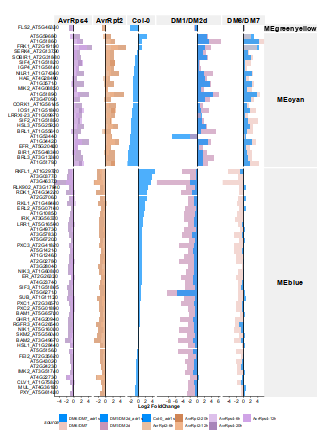

In [64]:
width_ = 8.1
height_ = 11
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 40)

bar_LRR <- plot_NLRs_overlay_bar(Res = Res_LRRs %>% filter(AGI %in% filtered_RLKs) , 
                      Res_base = Res_LRRs_Col  %>% filter(AGI %in% filtered_RLKs) , 
                      facet_row = "module", alpha = 0.7) + theme( strip.text.y = element_text(angle = 0))  # Make facet labels horizontal)
# Save the final plot to a PDF file
bar_LRR
bar_LRR %>% ggsave(file = paste0("./plots/RLK_overlap_bar_LRRs", Sys.time(), ".pdf"), width = width_ , height = height_)

In [65]:
Res_LRRs %>% pull(AGI) %>% unique %>% length

[1] 103

In [111]:
filtered_LRRs <- Res_LRRs  %>% filter(abs(log2FC) > 3.9) %>% pull(AGI) %>% unique 
filtered_LRRs <- c(filtered_LRRs, "AT3G23110")
filtered_LRRs %>% length

[1] 30

In [112]:
Res_LRRs %>% pull(AGI) %>% unique %>% length

[1] 103

In [113]:
library(glue)
library(ggtext)

generate_Res_color <- function(cols_text, Res) {
  cols_text_2 <- cols_text %>% as.data.frame() %>%  tibble::rownames_to_column("Class") %>% rename(label_color = 2)

  Res <- Res %>% 
      mutate(plot_label = paste0(Symbol, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) %>% 
      left_join(cols_text_2, by = 'Class')  

  # Extract plot_label and label_color from Res_NLRs and
  plot_label_color <- Res %>% select(plot_label, label_color)

  # Create a named list with label_color as content and plot_label as names
  color_list <- setNames(as.list(plot_label_color$label_color), plot_label_color$plot_label)

  Res_color <- Res %>% mutate(label_color_markdown =
          glue("<i style='color: {color_list[plot_label]}'>{plot_label}</i>")) 

  return(Res_color)
}


In [114]:
Res_LRRs %>% names

[1] "AGI"                      "log2FC"                  
 [3] "source"                   "gene_name.x"             
 [5] "label_color_markdown"     "connectivity_rowSums_adj"
 [7] "module"                   "gene_name.y"             
 [9] "DM6.DM7"                  "DM1.DM2d"                
[11] "DM10.DM11"                "AvrRpt2.6h"              
[13] "AvrRpt2.12h"              "AvrRpt2.20h"             
[15] "AvrRps4.6h"               "AvrRps4.12h"             
[17] "AvrRps4.20h"              "DM1.DM2d_adr1s"          
[19] "Col.0_adr1s"              "DM6.DM7_adr1s"           
[21] "GeneFamily"               "category"

In [115]:
cols_text_LRRs <- c( 'LRR-RLKs' =  "#386cb0",
                 'LRR-RLPs' = "#984ea3" )
Res_LRRs_color <- generate_Res_color(cols_text_LRRs, Res_LRRs %>% filter(AGI %in% filtered_LRRs) %>% dplyr::rename('Symbol' = 'gene_name.x', 'Class' = 'GeneFamily') )

In [116]:
Res_LRRs_color_Col <- Res_LRRs_color %>% filter(category =='Col-0') %>% arrange(log2FC)

In [117]:
Res_LRRs_color %>% pull(AGI) %>% unique %>% length

[1] 30

In [118]:
Res_LRRs_color %>% saveRDS('./Rdata/Res_LRRs_color.rds')

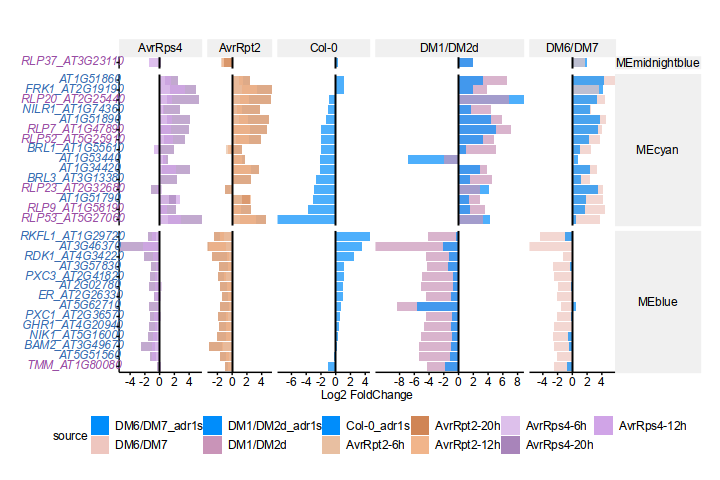

In [155]:
width_ = 7.2
height_ = 4.8
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 100)

bar_NLRs_plot <- plot_NLRs_overlay_bar(Res = Res_LRRs_color , 
                      Res_base = Res_LRRs_color_Col, 
                      facet_row = "module", alpha = 0.7) + theme( strip.text.y = element_text(angle = 0)) +
                        theme_custom()# Make facet labels horizontal)
# Save the final plot to a PDF file
bar_NLRs_plot
bar_NLRs_plot %>% ggsave(file = paste0("./plots/overlap_bar_LRRs", Sys.time(), ".pdf"),
                         width = width_ , height = height_)

In [120]:
Res_LRRs_color

AGI,log2FC,source,Symbol,label_color_markdown,connectivity_rowSums_adj,module,gene_name.y,DM6.DM7,DM1.DM2d,⋯,AvrRps4.6h,AvrRps4.12h,AvrRps4.20h,DM1.DM2d_adr1s,Col.0_adr1s,DM6.DM7_adr1s,Class,category,plot_label,label_color
<chr>,<dbl>,<fct>,<chr>,<glue>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
AT1G80080,-2.4814895,DM6/DM7,TMM,<i style='color: #984ea3'>TMM_AT1G80080</i>,1270.01551,MEblue,TMM,-2.4814895,-4.265392,⋯,-0.081361380,0.07434192,-0.2511076,-1.7788927,-0.9417167,-0.609777816,LRR-RLPs,DM6/DM7,TMM_AT1G80080,#984ea3
AT1G55610,2.4882216,DM6/DM7,BRL1,<i style='color: #386cb0'>BRL1_AT1G55610</i>,1514.45236,MEcyan,BRL1,2.4882216,5.013700,⋯,-0.349835404,-0.63856201,1.8318759,0.8853074,-1.9721054,0.960869895,LRR-RLKs,DM6/DM7,BRL1_AT1G55610,#386cb0
AT1G74360,2.5170643,DM6/DM7,NILR1,<i style='color: #386cb0'>NILR1_AT1G74360</i>,1920.08218,MEcyan,NILR1,2.5170643,4.299102,⋯,0.426404053,0.57972050,2.7557154,1.6579608,-1.0247750,2.266635452,LRR-RLKs,DM6/DM7,NILR1_AT1G74360,#386cb0
AT1G34420,3.2164442,DM6/DM7,AT1G34420,<i style='color: #386cb0'>AT1G34420</i>,1577.09348,MEcyan,AT1G34420,3.2164442,3.804021,⋯,0.281529516,2.18005592,4.0326959,2.8888508,-2.0531996,2.354970512,LRR-RLKs,DM6/DM7,AT1G34420,#386cb0
AT1G47890,3.9683862,DM6/DM7,RLP7,<i style='color: #984ea3'>RLP7_AT1G47890</i>,1676.80046,MEcyan,RLP7,3.9683862,6.984235,⋯,0.074775789,1.49102278,3.8692165,5.0494169,-1.9401910,3.399546310,LRR-RLPs,DM6/DM7,RLP7_AT1G47890,#984ea3
AT1G51790,4.1204225,DM6/DM7,AT1G51790,<i style='color: #386cb0'>AT1G51790</i>,1751.83483,MEcyan,AT1G51790,4.1204225,2.806600,⋯,1.267787629,2.65358713,2.1797447,1.3652799,-2.9765408,1.759158875,LRR-RLKs,DM6/DM7,AT1G51790,#386cb0
AT1G29720,-4.2971752,DM6/DM7,RKFL1,<i style='color: #386cb0'>RKFL1_AT1G29720</i>,1428.72426,MEblue,RKFL1,-4.2971752,-4.010906,⋯,-0.488848013,-1.03203470,-1.5638814,-0.2377339,4.6355946,-0.946509988,LRR-RLKs,DM6/DM7,RKFL1_AT1G29720,#386cb0
AT1G51860,5.7929978,DM6/DM7,AT1G51860,<i style='color: #386cb0'>AT1G51860</i>,1457.83497,MEcyan,AT1G51860,5.7929978,6.464072,⋯,0.728051442,1.51594583,2.3650714,3.1803573,1.0655262,4.174568235,LRR-RLKs,DM6/DM7,AT1G51860,#386cb0
AT1G51890,4.5212722,DM6/DM7,AT1G51890,<i style='color: #386cb0'>AT1G51890</i>,1921.27927,MEcyan,AT1G51890,4.5212722,5.884220,⋯,0.895966607,1.62621659,4.0297651,4.3062794,-1.2377279,3.660608138,LRR-RLKs,DM6/DM7,AT1G51890,#386cb0


In [121]:
Res_LRRs_color %>% group_by(source) %>% summarise(mean_log2FC = mean(log2FC))

source,mean_log2FC
<fct>,<dbl>
DM1/DM2d,-0.3643935863
DM1/DM2d_adr1s,0.6844342298
DM6/DM7,0.6269976992
DM6/DM7_adr1s,1.1605014996
Col-0_adr1s,-0.5224357459
AvrRpt2-6h,-0.0001090277
AvrRpt2-12h,0.3587127495
AvrRpt2-20h,0.6259298269
AvrRps4-6h,0.1581415055


In [122]:
Res_combined %>% saveRDS('./Rdata/Res_combined.rds')

In [123]:
TIR_containing <- NLRs_and_TIRs %>% dplyr::filter(Class %>% str_detect('TIR'))
TIR_containing %>% saveRDS('./Rdata/TIR_containing.rds')

In [124]:
TIR_containing

AGI,Class,Symbol,Organization
<chr>,<chr>,<chr>,<chr>
AT1G09665,TIR,AT1G09665,NA
AT1G47370,TIR,AT1G47370,NA
AT1G51270,TIR,AT1G51270,NA
AT1G52900,TIR,AT1G52900,NA
AT1G57630,TIR,AT1G57630,NA
AT1G57670,TIR,AT1G57670,NA
AT1G57830,TIR,AT1G57830,NA
AT1G57850,TIR,AT1G57850,NA
AT1G60320,TIR,AT1G60320,NA


In [125]:
nlp20_1h <- readxl::read_excel('./Ding2021_Yueling_Zhang_TIR_Boost/boost_TIR_headeer_revised.xlsx', sheet = 'nlp20_1h') %>% mutate_all(~str_trim(.)) %>% dplyr::select(-Description)  %>% filter(`Gene ID` != 'NA')
flg22_30min <- readxl::read_excel('./Ding2021_Yueling_Zhang_TIR_Boost/boost_TIR_headeer_revised.xlsx', sheet = 'flg22_30min') %>% mutate_all(~str_trim(.)) %>% dplyr::select(-Description)  %>% filter(`Gene ID` != 'NA')
nlp20_6h <- readxl::read_excel('./Ding2021_Yueling_Zhang_TIR_Boost/boost_TIR_headeer_revised.xlsx', sheet = 'nlp20_6h') %>% mutate_all(~str_trim(.)) %>% dplyr::select(-Description) %>% filter(`Gene ID` != 'NA')

In [126]:
flg22_30min%>% nrow()
nlp20_6h %>% nrow
nlp20_1h %>% nrow

[1] 46

[1] 14

[1] 26

In [127]:
nlp20_1h

Gene ID,Log2Fold Change,Adjusted p-value,Gene Name
<chr>,<chr>,<chr>,<chr>
AT1G66090,4.182314,2.11e-10,NA
AT2G32140,3.410955,0.000612,NA
AT3G04220,2.978868,5.65e-06,NA
AT5G41750,2.702796,0.000129,NA
AT3G04210,2.613868,1.24e-08,NA
AT2G20142,2.309786,0.00193,NA
AT4G19520,2.105768,7.57e-06,NA
AT5G22690,1.954292,1.7e-05,NA
AT1G72900,1.927421,0.00163,NA


In [128]:
flg22_30min

Gene ID,Log2Fold Change,Adjusted p-value,Gene Name
<chr>,<chr>,<chr>,<chr>
AT1G66090,23.2,2.52e-54,NA
AT1G65390,19.4,0,PP2A5
AT4G19520,12.3,0,NA
AT5G41750,12.3,2.09e-168,NA
AT5G41740,11.6,3.96e-217,NA
AT1G72900,10,3.4e-31,NA
AT2G32140,8.9,1.59e-31,NA
AT2G20142,8.8,1.73e-08,NA
AT4G14370,8.4,1.2e-76,NA


In [129]:
nlp20_6h

Gene ID,Log2Fold Change,Adjusted p-value,Gene Name
<chr>,<chr>,<chr>,<chr>
AT1G57630,7.14555,3.84e-06,NA
AT4G11170,4.73465,0.000444,NA
AT5G45090,3.91362,0.0151,PP2A7
AT1G47370,3.62641,0.0283,NA
AT2G32140,3.59523,0.0172,NA
AT5G41750,3.33276,0.000223,NA
AT1G66090,3.02848,0.000422,NA
AT1G72920,2.84247,0.0031,NA
AT5G45000,2.74362,0.0149,NA


In [130]:
Res_combined %>% pull(source) %>% unique

[1] DM6/DM7        DM1/DM2d       DM10/DM11      AvrRpt2-6h     AvrRpt2-12h   
 [6] AvrRpt2-20h    AvrRps4-6h     AvrRps4-12h    AvrRps4-20h    DM1/DM2d_adr1s
[11] DM6/DM7_adr1s  Col-0_adr1s   
12 Levels: DM10/DM11 DM1/DM2d DM1/DM2d_adr1s DM6/DM7 ... AvrRps4-20h

In [131]:
Res_TIR_containing <-  Res_combined %>% filter(AGI %in% TIR_containing$AGI)

In [132]:
Res_TIR_containing %>% saveRDS('./Rdata/Res_TIR_containing.rds')

In [133]:
DM_up_TIR_containing <- Res_TIR_containing %>% filter(source %in% c('DM10/DM11', 'DM1/DM2d', 'DM6/DM7')) %>% 
    filter(log2FC > 2) %>% pull(AGI) %>% unique 

In [134]:
Pathogen_up_TIR_containing <- Res_TIR_containing %>% filter(source %in% c('AvrRpt2-6h','AvrRpt2-12h','AvrRpt2-20h','AvrRps4-6h','AvrRps4-12h','AvrRps4-20h')) %>% filter(log2FC > 2) %>% pull(AGI) %>% unique

In [135]:
PTI_up_TIR_containing <- nlp20_1h %>%  rbind(nlp20_6h) %>% rbind(flg22_30min) %>% pull(`Gene ID`) %>% unique 

In [136]:
up_TIR_containing <- list('DM' = DM_up_TIR_containing,'Pathogen' = Pathogen_up_TIR_containing, 'PTI' = PTI_up_TIR_containing)

In [137]:
up_TIR_containing %>% saveRDS('./Rdata/up_TIR_containing.rds')

In [138]:
library(VennDiagram)
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
plot_venn <- function (genes_list, main_title = '') {
    venn.diagram(genes_list, 
                          fill = c( "#A58AFF", '#D08555', '#4DAFFC'),
                  alpha = c(0.5, 0.5,0.5), cat.cex = 1, ## Vector giving the size for each category name
                  cex=1,filename=NULL,  cat.dist = 0.08, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Arial",
                              cat.fontfamily = "Arial",
                    main =  main_title,
                        main.pos = c(0.5, 1), main.fontface = "plain",
                    main.fontfamily = "Arial", main.col = "black",
                    main.cex = 1, fontfamily = 'Arial',
                  ggplot = T) 
}

In [139]:
up_TIR_containing

$DM
 [1] "AT1G65850" "AT1G72860" "AT1G72850" "AT1G57850" "AT1G51270" "AT1G17615"
 [7] "AT1G57630" "AT1G72950" "AT1G72900" "AT5G46260" "AT5G48780" "AT5G38340"
[13] "AT5G18360" "AT5G44910" "AT5G45070" "AT5G41540" "AT5G38344" "AT5G46520"
[19] "AT5G44900" "AT5G41550" "AT5G45000" "AT5G41750" "AT5G44920" "AT5G18350"
[25] "AT5G17970" "AT5G45090" "AT3G51570" "AT3G04220" "AT3G25510" "AT3G44400"
[31] "AT2G17055" "AT2G17060" "AT2G20142" "AT2G32140" "AT2G17050" "AT2G16870"
[37] "AT4G23510" "AT4G11170" "AT4G08450" "AT4G19925" "AT4G14370" "AT4G23515"
[43] "AT4G09420" "AT1G31540" "AT1G72870" "AT1G72890" "AT1G17600" "AT1G66090"
[49] "AT1G17610" "AT1G52900" "AT5G58120" "AT5G45080" "AT5G18370" "AT5G44510"
[55] "AT5G49140" "AT5G41740" "AT5G51630" "AT5G46490" "AT3G51560" "AT4G19520"
[61] "AT4G19920" "AT4G11340" "AT4G16920" "AT4G16960" "AT1G72940" "AT1G47370"
[67] "AT1G56510" "AT1G56520" "AT1G64070" "AT1G63870" "AT1G72930" "AT1G72920"
[73] "AT1G72910" "AT5G46510" "AT3G44670" "AT3G04210" "AT3G44480" "AT3G44630"
[79] "AT2G14080" "AT4G36150" "AT4G16890"

$Pathogen
 [1] "AT5G45200" "AT5G45080" "AT5G18350" "AT5G17970" "AT4G23515" "AT1G65850"
 [7] "AT1G17615" "AT1G66090" "AT1G52900" "AT1G72920" "AT1G65390" "AT5G38344"
[13] "AT5G45000" "AT5G41750" "AT5G45090" "AT3G04220" "AT2G20142" "AT2G32140"
[19] "AT4G11170" "AT4G08450" "AT4G11340" "AT1G72940" "AT1G72860" "AT1G51270"
[25] "AT1G72890" "AT1G57630" "AT1G17610" "AT1G72900" "AT5G51630" "AT5G46520"
[31] "AT3G44400" "AT2G17055" "AT2G16870" "AT4G19520" "AT4G19925" "AT4G14370"
[37] "AT3G51560" "AT1G61105" "AT4G23510"

$PTI
 [1] "AT1G66090" "AT2G32140" "AT3G04220" "AT5G41750" "AT3G04210" "AT2G20142"
 [7] "AT4G19520" "AT5G22690" "AT1G72900" "AT1G17600" "AT1G65390" "AT2G16870"
[13] "AT5G44870" "AT1G56540" "AT5G41740" "AT4G36150" "AT4G16960" "AT1G72940"
[19] "AT5G46510" "AT5G46470" "AT4G16860" "AT3G44630" "AT4G36140" "AT1G31540"
[25] "AT5G45250" "AT4G16890" "AT1G57630" "AT4G11170" "AT5G45090" "AT1G47370"
[31] "AT1G72920" "AT5G45000" "AT5G58120" "AT4G14370" "AT5G44910" "AT1G51270"
[37] "AT1G63860" "AT1G63750" "AT1G56510" "AT1G72910" "AT1G72930" "AT4G16940"
[43] "AT5G46520" "AT5G40910" "AT3G44400" "AT1G56520" "AT5G45070" "AT5G11250"
[49] "AT5G41550" "AT3G44480" "AT1G72950" "AT1G63740"

In [140]:
TIR_containing

AGI,Class,Symbol,Organization
<chr>,<chr>,<chr>,<chr>
AT1G09665,TIR,AT1G09665,NA
AT1G47370,TIR,AT1G47370,NA
AT1G51270,TIR,AT1G51270,NA
AT1G52900,TIR,AT1G52900,NA
AT1G57630,TIR,AT1G57630,NA
AT1G57670,TIR,AT1G57670,NA
AT1G57830,TIR,AT1G57830,NA
AT1G57850,TIR,AT1G57850,NA
AT1G60320,TIR,AT1G60320,NA


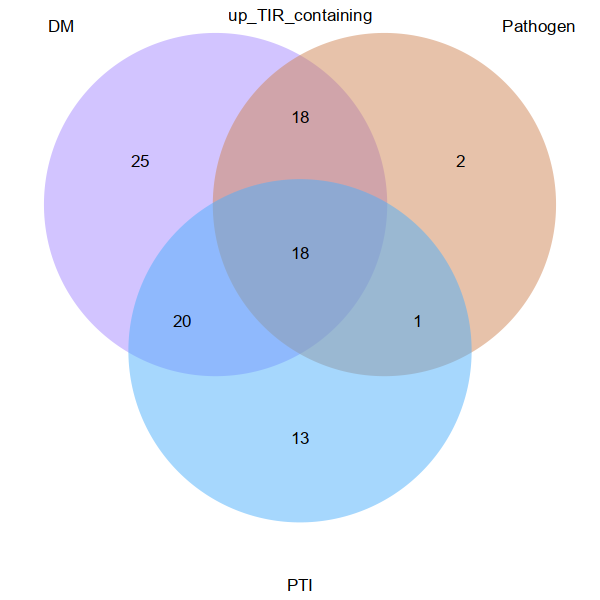

In [141]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)

up_TIR_containing_plot <- plot_venn(up_TIR_containing,'up_TIR_containing')
grid.newpage()
grid.draw(up_TIR_containing_plot)

In [142]:

pdf(file="./plots/TIRs.pdf", width = 2.7, height = 2.7)
grid.newpage()
grid.draw(up_TIR_containing_plot)
dev.off()

png 
  2

In [143]:
extract_genes_info <- function(genes_list) {
  # Calculate the intersection (overlaps) among all lists
  total_overlap <- Reduce(intersect, genes_list)

  # Calculate pairwise intersections, excluding the total overlap
  pairwise_intersections <- list()
  for (i in 1:(length(genes_list)-1)) {
    for (j in (i+1):length(genes_list)) {
      key <- paste(names(genes_list)[c(i, j)], collapse = "+")
      pairwise_overlap <- intersect(genes_list[[i]], genes_list[[j]])
      pairwise_intersections[[key]] <- setdiff(pairwise_overlap, total_overlap)
    }
  }

  # Calculate unique elements for each list
  unique_elements <- lapply(names(genes_list), function(name) {
    other_lists <- genes_list[names(genes_list) != name]
    unique_to_list <- Reduce(setdiff, c(list(genes_list[[name]]), other_lists))
    return(unique_to_list)
  })
  names(unique_elements) <- names(genes_list)

  # Return a list containing the overlaps and unique elements
  return(list(total_overlap = total_overlap,
              pairwise_intersections = pairwise_intersections,
              unique = unique_elements))
}

# Example usage with your up_TIR_containing list
genes_info <- extract_genes_info(up_TIR_containing)


In [144]:
genes_info

$total_overlap
 [1] "AT1G51270" "AT1G57630" "AT1G72900" "AT5G46520" "AT5G45000" "AT5G41750"
 [7] "AT5G45090" "AT3G04220" "AT3G44400" "AT2G20142" "AT2G32140" "AT2G16870"
[13] "AT4G11170" "AT4G14370" "AT1G66090" "AT4G19520" "AT1G72940" "AT1G72920"

$pairwise_intersections
$pairwise_intersections$`DM+Pathogen`
 [1] "AT1G65850" "AT1G72860" "AT1G17615" "AT5G38344" "AT5G18350" "AT5G17970"
 [7] "AT2G17055" "AT4G23510" "AT4G08450" "AT4G19925" "AT4G23515" "AT1G72890"
[13] "AT1G17610" "AT1G52900" "AT5G45080" "AT5G51630" "AT3G51560" "AT4G11340"

$pairwise_intersections$`DM+PTI`
 [1] "AT1G72950" "AT5G44910" "AT5G45070" "AT5G41550" "AT1G31540" "AT1G17600"
 [7] "AT5G58120" "AT5G41740" "AT4G16960" "AT1G47370" "AT1G56510" "AT1G56520"
[13] "AT1G72930" "AT1G72910" "AT5G46510" "AT3G04210" "AT3G44480" "AT3G44630"
[19] "AT4G36150" "AT4G16890"

$pairwise_intersections$`Pathogen+PTI`
[1] "AT1G65390"


$unique
$unique$DM
 [1] "AT1G72850" "AT1G57850" "AT5G46260" "AT5G48780" "AT5G38340" "AT5G18360"
 [7] "AT5G41540" "AT5G44900" "AT5G44920" "AT3G51570" "AT3G25510" "AT2G17060"
[13] "AT2G17050" "AT4G09420" "AT1G72870" "AT5G18370" "AT5G44510" "AT5G49140"
[19] "AT5G46490" "AT4G19920" "AT4G16920" "AT1G64070" "AT1G63870" "AT3G44670"
[25] "AT2G14080"

$unique$Pathogen
[1] "AT5G45200" "AT1G61105"

$unique$PTI
 [1] "AT5G22690" "AT5G44870" "AT1G56540" "AT5G46470" "AT4G16860" "AT4G36140"
 [7] "AT5G45250" "AT1G63860" "AT1G63750" "AT4G16940" "AT5G40910" "AT5G11250"
[13] "AT1G63740"

In [145]:
genes_info 

$total_overlap
 [1] "AT1G51270" "AT1G57630" "AT1G72900" "AT5G46520" "AT5G45000" "AT5G41750"
 [7] "AT5G45090" "AT3G04220" "AT3G44400" "AT2G20142" "AT2G32140" "AT2G16870"
[13] "AT4G11170" "AT4G14370" "AT1G66090" "AT4G19520" "AT1G72940" "AT1G72920"

$pairwise_intersections
$pairwise_intersections$`DM+Pathogen`
 [1] "AT1G65850" "AT1G72860" "AT1G17615" "AT5G38344" "AT5G18350" "AT5G17970"
 [7] "AT2G17055" "AT4G23510" "AT4G08450" "AT4G19925" "AT4G23515" "AT1G72890"
[13] "AT1G17610" "AT1G52900" "AT5G45080" "AT5G51630" "AT3G51560" "AT4G11340"

$pairwise_intersections$`DM+PTI`
 [1] "AT1G72950" "AT5G44910" "AT5G45070" "AT5G41550" "AT1G31540" "AT1G17600"
 [7] "AT5G58120" "AT5G41740" "AT4G16960" "AT1G47370" "AT1G56510" "AT1G56520"
[13] "AT1G72930" "AT1G72910" "AT5G46510" "AT3G04210" "AT3G44480" "AT3G44630"
[19] "AT4G36150" "AT4G16890"

$pairwise_intersections$`Pathogen+PTI`
[1] "AT1G65390"


$unique
$unique$DM
 [1] "AT1G72850" "AT1G57850" "AT5G46260" "AT5G48780" "AT5G38340" "AT5G18360"
 [7] "AT5G41540" "AT5G44900" "AT5G44920" "AT3G51570" "AT3G25510" "AT2G17060"
[13] "AT2G17050" "AT4G09420" "AT1G72870" "AT5G18370" "AT5G44510" "AT5G49140"
[19] "AT5G46490" "AT4G19920" "AT4G16920" "AT1G64070" "AT1G63870" "AT3G44670"
[25] "AT2G14080"

$unique$Pathogen
[1] "AT5G45200" "AT1G61105"

$unique$PTI
 [1] "AT5G22690" "AT5G44870" "AT1G56540" "AT5G46470" "AT4G16860" "AT4G36140"
 [7] "AT5G45250" "AT1G63860" "AT1G63750" "AT4G16940" "AT5G40910" "AT5G11250"
[13] "AT1G63740"

In [146]:
genes_info %>% saveRDS('./Rdata/TIR_venn_genes_info.rds')

In [147]:
#print current dir
getwd()

[1] "/media/HDD2/donghui/Pathogen_JC14_3DM"

In [148]:
create_genes_table <- function(genes_info) {
  # Initialize an empty data frame for the results
  genes_table <- data.frame(AGI = character(), Category = character(), stringsAsFactors = FALSE)

  # Process total overlap
  genes_table <- rbind(genes_table, data.frame(AGI = genes_info$total_overlap, Category = 'Total Overlap'))

  # Process pairwise intersections
  for (pair in names(genes_info$pairwise_intersections)) {
    genes_table <- rbind(genes_table, data.frame(AGI = genes_info$pairwise_intersections[[pair]], Category = pair))
  }

  # Process unique genes
  for (unique_list in names(genes_info$unique)) {
    category_name <- paste(unique_list, "Unique", sep = " ")
    genes_table <- rbind(genes_table, data.frame(AGI = genes_info$unique[[unique_list]], Category = category_name))
  }

  return(genes_table)
}

# Use the function to create the table
genes_table <- create_genes_table(genes_info)


In [149]:
genes_table <- genes_table %>% left_join(map_id_name, by =c('AGI' = 'gene_id')) %>% left_join(NLRs_and_TIRs, by = c('AGI' = 'AGI')) %>% left_join(updated_NLRs_table, by = c('AGI' = 'AGI')) %>% mutate(gene_name2 = coalesce(Primary.Gene.Symbol, gene_name, Symbol)) %>% dplyr::select(AGI,gene_name2, , Class, Category) %>% 
    dplyr::rename('gene_name' = 'gene_name2') 

In [150]:
genes_table

AGI,gene_name,Class,Category
<chr>,<chr>,<chr>,<chr>
AT1G51270,AT1G51270,TIR,Total Overlap
AT1G57630,AT1G57630,TIR,Total Overlap
AT1G72900,TN7,TIR-NBS,Total Overlap
AT5G46520,ACQOS,TIR-NBS-LRR,Total Overlap
AT5G45000,AT5G45000,TIR,Total Overlap
AT5G41750,DM1_Like,TIR-NBS-LRR,Total Overlap
AT5G45090,PP2-A7,TIR,Total Overlap
AT3G04220,AT3G04220,TIR-NBS-LRR,Total Overlap
AT3G44400,DM2-Like,TIR-NBS-LRR,Total Overlap


In [151]:
genes_table %>% write.csv('./tables/up_TIR_containing.csv', row.names = F)